<a href="https://colab.research.google.com/github/vachkim/LECTURE/blob/master/MACHINE_LEARNING/Lec_BOSTON_DATA_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1) 구글 드라이브 연결

In [ ]:
from google.colab import drive

ROOT = '/content/drive'
drive.mount(ROOT)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
%cd drive/'My Drive'/'Colab Notebooks'/'Data'
#%cd, you tell IPython to change its own working directory.

/content/drive/My Drive/Colab Notebooks/Data


In [ ]:
%ls
#%ls는 list directory contents명령어다

sample_submission.csv  test.csv  train.csv


### 2) 데이터 수집

In [ ]:
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl 
from matplotlib.pyplot import figure
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
%matplotlib inline

plt.rcParams['figure.figsize'] = (14,4) #rcParams = handling default matplotlib values
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

### 3) 변수 분류
- 변수의 종류에 따라 시각화 방법이 달라지기 때문에 우선 numerical & categorical을 분류하는 것이 중요

In [ ]:
#numerical feature 구분법 _ select_dtypes(include=[np.number])를 활용
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html
numeric_features = train.select_dtypes(include=[np.number]) 
print(numeric_features) #select_dtypes하면 numeric value가 포함된 column으로 dataframe 만듦
print(numeric_features.columns)
#여기서 중요한 건 id는 순서를 주기위한 임시적인 값으므로 패턴 파악이 무의미하다
#따라서 분석을 하는 과정에서는 id 값을 제거해주어야 한다

        Id  MSSubClass  LotFrontage  ...  MoSold  YrSold  SalePrice
0        1          60         65.0  ...       2    2008     208500
1        2          20         80.0  ...       5    2007     181500
2        3          60         68.0  ...       9    2008     223500
3        4          70         60.0  ...       2    2006     140000
4        5          60         84.0  ...      12    2008     250000
...    ...         ...          ...  ...     ...     ...        ...
1455  1456          60         62.0  ...       8    2007     175000
1456  1457          20         85.0  ...       2    2010     210000
1457  1458          70         66.0  ...       5    2010     266500
1458  1459          20         68.0  ...       4    2010     142125
1459  1460          20         75.0  ...       6    2008     147500

[1460 rows x 38 columns]
Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'Bsm

In [ ]:
categorical_features = train.select_dtypes(exclude=[np.number]) 
#include대신 exclude를 쓰면 categorical만 뽑을 수 있다
print(categorical_features)
print(categorical_features.columns)

     MSZoning Street Alley LotShape  ...  Fence MiscFeature SaleType SaleCondition
0          RL   Pave   NaN      Reg  ...    NaN         NaN       WD        Normal
1          RL   Pave   NaN      Reg  ...    NaN         NaN       WD        Normal
2          RL   Pave   NaN      IR1  ...    NaN         NaN       WD        Normal
3          RL   Pave   NaN      IR1  ...    NaN         NaN       WD       Abnorml
4          RL   Pave   NaN      IR1  ...    NaN         NaN       WD        Normal
...       ...    ...   ...      ...  ...    ...         ...      ...           ...
1455       RL   Pave   NaN      Reg  ...    NaN         NaN       WD        Normal
1456       RL   Pave   NaN      Reg  ...  MnPrv         NaN       WD        Normal
1457       RL   Pave   NaN      Reg  ...  GdPrv        Shed       WD        Normal
1458       RL   Pave   NaN      Reg  ...    NaN         NaN       WD        Normal
1459       RL   Pave   NaN      Reg  ...    NaN         NaN       WD        Normal

[14

In [ ]:
#각 변수의 종류별 갯수
print('The total number of numeric feature columns is', len(numeric_features.columns))
print('The total number of categorical feature columns is', len(categorical_features.columns))

The total number of numeric feature columns is 38
The total number of categorical feature columns is 43


### 4) 변수 분석

In [ ]:
#numerical 변수부터 분석해보자
print(numeric_feature.columns)
#id는 패턴 발견에 무의미
#salesprice는 종속변수

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [ ]:
#매출(salesprice)과 관련된 데이터 셋에 있어서 시간정보는 중요
#따라서 위 중 year정보를 포함한 변수를 추려볼 것
year_fea = [fea for fea in numeric_features if 'Yr' in fea or 'Year' in fea]
#for-if문으로 조건에 맞는 변수만 뽑기
#변수명 for (변수명 in 목록 if 조건) _ 물론 괄호는 내가 이해하기 쉬우려고 임의로 한거 
print(year_fea)

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


In [ ]:
# YearBuilt: Original construction date
# YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
# GarageYrBlt: Year garage was built
# YrSold: Year Sold (YYYY)

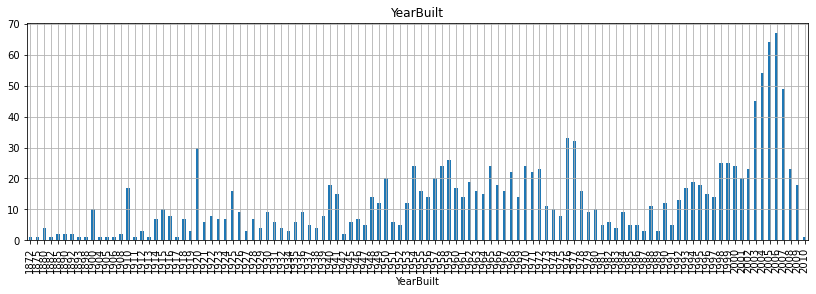

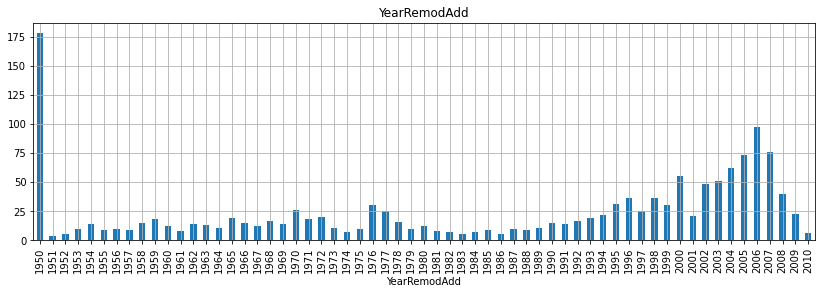

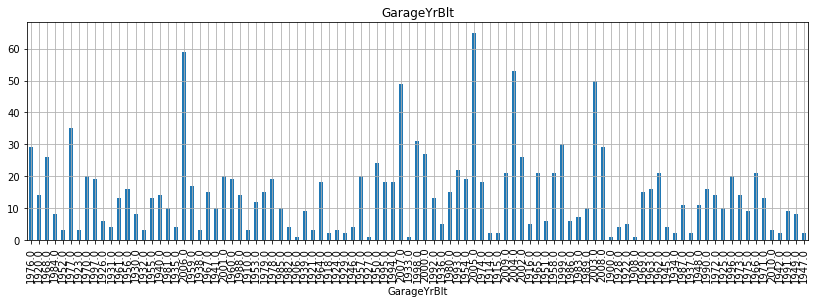

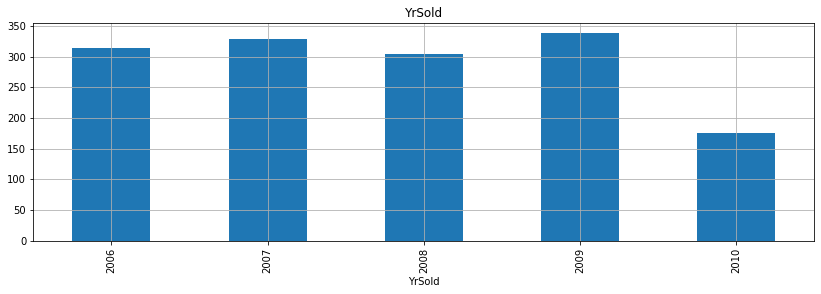

In [ ]:
#각 변수가 갖고 있는 연도 정보 파악하기_ by 시각화
for fea in year_fea:
  data=train.copy() # train dataset 원본을 불러오면 위험하니깐 copy를 사용하기
  data[fea].value_counts(sort=False).plot(kind='bar')
  plt.xlabel(fea)
  plt.title(fea)
  plt.show()

In [ ]:
#보면 YearSold를 제외한 나머지 얘들은 연도가 1900년대부터 시작

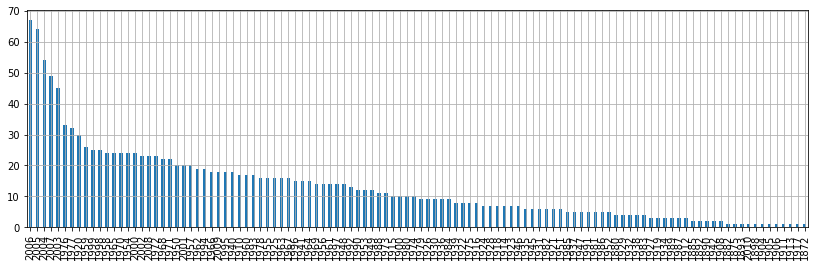

In [ ]:
#이해를 돕기 위해 위의 변수 하나씩 빼본거
data['YearBuilt'].value_counts(sort=True).plot(kind='bar')
#sort를 넣으면 가장 많은 숫자부터 나오네

In [ ]:
#kind='bar'을 안넣어주면 그래프가 안나오는데?
data['YearBuilt'].value_counts(sort=False).plot

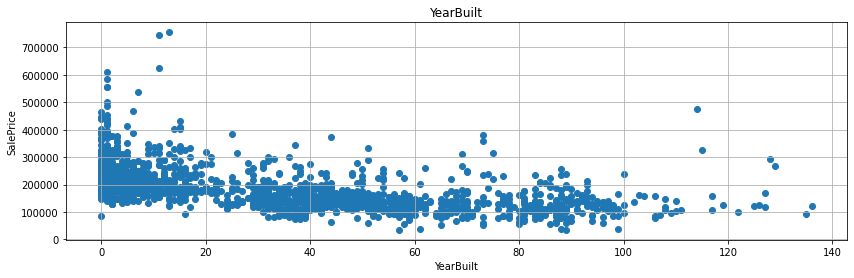

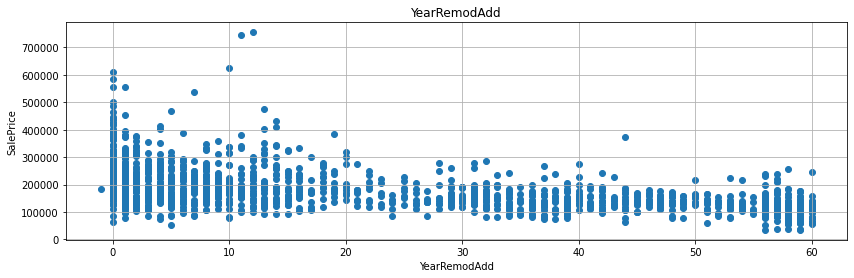

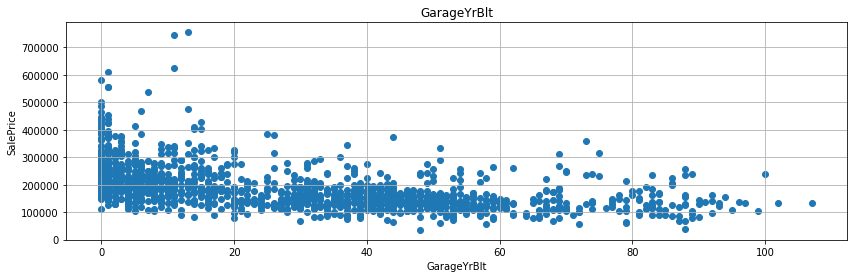

In [ ]:
#판매된 연도와 다른 연도변수와의 관계가 종속변수에 어떤 영향을 끼치는지 알기 위해
#판매된 연도와 다른 연도변수의 차이를 구해서 그래프를 그려봄
for fea in year_fea:
  if fea!='YrSold': 
#판매된 연도와의 차이를 구하는 거니깐 위 변수 자체는 계산식에 넣지 않는다
#정확히 말하면 feq에 들어온 값이 YrSold가 아닐 경우 아래 식을 진행한다는 의미
    data=train.copy()
    data[fea]=data['YrSold']-data[fea] 
    #두 개 다 value값이 연도(숫자)라서 차이 계산 가능
    #이렇계 하면 차이 값이 value로 들어간 data[fea]가 만들어지는 거지
    plt.scatter(data[fea],data['SalePrice']) #fea칼럼과 salesprice로 이루어진 산점도 그리기
    plt.title(fea)
    plt.xlabel(fea)
    plt.ylabel('SalePrice')
    plt.show()

In [ ]:
#위 산점도를 통해 연수의 차이가 작을수록(최근 지어지거나, 리모델링 된 집이수록) 
#판매가가 비싸다는 것을 알 수 있다

### 5)양적 변수 시각화 _ 이산형 변수

In [ ]:
#직접 만든 데이터 프레임 예제
temp = pd.DataFrame({'id':[1,2,3,4,5,6,7,8,9,10],
                    'number_of_rooms':[2,4,3,2,4,3,3,4,2,3],
                    'SalesPrice':[1000,1300,2000,1030,2030,2050,2000,1050,3000,2000]})
print(temp)

   id  number_of_rooms  SalesPrice
0   1                2        1000
1   2                4        1300
2   3                3        2000
3   4                2        1030
4   5                4        2030
5   6                3        2050
6   7                3        2000
7   8                4        1050
8   9                2        3000
9  10                3        2000


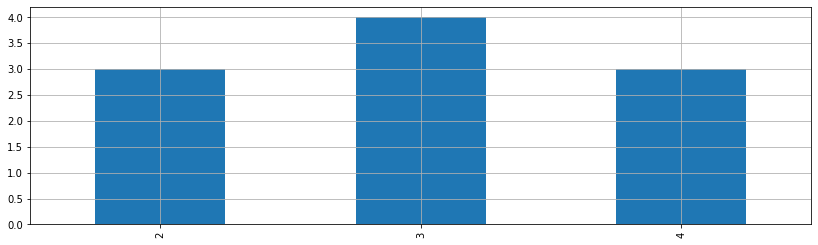

In [ ]:
#데이터프레임의 value_counts기능을 이용해 시각화
temp['number_of_rooms'].value_counts(sort=False).plot.bar() #이렇게 써도 되고 plot(kind='bar')해도 되고
plt.show()

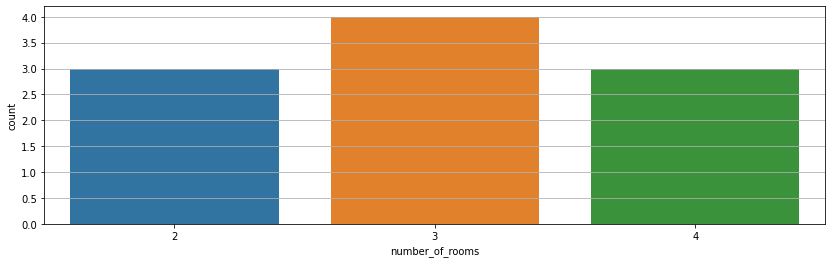

In [ ]:
#seaborn 사용해 시각화
sns.countplot(data=temp, x= 'number_of_rooms')
#sns.countplot = show the counts of observations in each categorical bin using bars
#https://seaborn.pydata.org/generated/seaborn.countplot.html
plt.show()